<a href="https://colab.research.google.com/github/TravellerOnCode/uHack-Sentiments-2.0-Decode-Code-Words/blob/main/uHack_Sentiments_2_0_Decode_Code_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The challenge here is to analyze and deep dive into the natural language text (reviews) and bucket them based on their topics of discussion. Furthermore, analyzing the overall sentiment will also help the business to make tangible decisions.

The data set provided to you has a mix of customer reviews for products across categories and retailers. We would like you to model on the data 

to bucket the future reviews in their respective topics (Note: A review can talk about multiple topics)

Overall polarity (positive/negative sentiment)

**Train: 6136 rows x 14 columns**

**Test: 2631 rows x 14 columns**
 

Topics : (Components, Delivery and Customer Support, Design and Aesthetics, Dimensions, Features, Functionality, Installation, Material, Price, Quality and Usability)

Polarity : (Positive/Negative)

# Imports

In [ ]:
#!pip uninstall numpy
#!pip install --upgrade numpy==1.11.0

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
import requests, zipfile, io
import pandas as pd
pd.options.mode.chained_assignment = None

In [ ]:
#from ast import literal_eval
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import re

# Load the Dataset

In [ ]:
#the csv is stored in a github repo
r_train = requests.get('https://github.com/TravellerOnCode/uHack-Sentiments-2.0-Decode-Code-Words/blob/main/data/train.csv?raw=true')
r_test = requests.get('https://github.com/TravellerOnCode/uHack-Sentiments-2.0-Decode-Code-Words/blob/main/data/test.csv?raw=true') 

df_train = pd.read_csv(io.BytesIO(r_train.content))
df_test = pd.read_csv(io.BytesIO(r_test.content))

In [ ]:
print('\nTraining Dataset : ',df_train.shape)
print(df_train.head(3))


Training Dataset :  (6136, 14)
   Id                                             Review  ...  Usability  Polarity
0   0  For some reason everybody complains and I'm co...  ...          1         0
1   1  I like everything about it, great choice of sp...  ...          0         1
2   2  Excellent ceiling fan brace. Easy to install a...  ...          0         1

[3 rows x 14 columns]


In [ ]:
print('\nTest Dataset : ',df_test.shape)
print(df_test.head(3))


Test Dataset :  (2631, 14)
   Id                                             Review  ...  Usability  Polarity
0   0  Made of very thin cheap metal broke on very fi...  ...        NaN       NaN
1   1  As good as the brand names, no jams or misfire...  ...        NaN       NaN
2   2  unit was easy to use, with understandable in s...  ...        NaN       NaN

[3 rows x 14 columns]


# Data Cleaning 

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
def clean_texts(data):
  X = []
  sentences = list(data)
  for sen in sentences:
    X.append(preprocess_text(sen))
  
  return X

# Data Splitting

In [ ]:
def split_dataset(train_dataset,split_ratio,is_sentiment='',no_test=''):

  test_split = split_ratio

  # Initial train and test split.
  if is_sentiment == 'X':
    train_df, test_df = train_test_split(
        train_dataset,
        test_size=test_split,
        stratify=train_dataset['Polarity'].values,
    )
  else:
    train_df, test_df = train_test_split(
        train_dataset,
        test_size=test_split,
        stratify=train_dataset[TOPICS].values,
    )

  # Splitting the test set further into validation
  # and new test sets.
  if no_test == '':
    val_df = test_df.sample(frac=0.5)
    test_df.drop(val_df.index, inplace=True)
  elif no_test == 'X':
    val_df = test_df

  print(f"Number of rows in training set: {len(train_df)}")
  print(f"Number of rows in validation set: {len(val_df)}")
  print(f"Number of rows in test set: {len(test_df)}")

  return (train_df,test_df,val_df)

In [ ]:
#train_df,test_df,val_df = split_dataset(df_train_new,'topic')

# Pre - Trained Word Embeddings 

In [ ]:
import os

**Download Word Embeddings**

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-01-12 16:44:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-01-12 16:44:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-01-12 16:44:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

**Embedding Matrix**

In [ ]:
def get_embedding_matrix(voc,word_index):
  #"/content/glove.6B.100d.txt"
  "/content/glove.6B.200d.txt"
  #Open the File
  path_to_glove_file = os.path.join(
    #os.path.expanduser("~"), "glove.6B.100d.txt")
    #"/content/", "glove.6B.100d.txt")
    "/content/", "glove.6B.200d.txt")

  embeddings_index = {}
  with open(path_to_glove_file) as f:
      for line in f:
          word, coefs = line.split(maxsplit=1)
          coefs = np.fromstring(coefs, "f", sep=" ")
          embeddings_index[word] = coefs

  print("Found %s word vectors." % len(embeddings_index))

  #Create the Matrix from the vocabulary
  num_tokens = NUM_OF_TOKENS
  embedding_dim = EMBEDDING_DIM
  hits = 0
  misses = 0

  # Prepare embedding matrix
  embedding_matrix = np.zeros((num_tokens, embedding_dim))
  for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          # Words not found in embedding index will be all-zeros.
          # This includes the representation for "padding" and "OOV"
          embedding_matrix[i] = embedding_vector
          hits += 1
      else:
          misses += 1

  print("Converted %d words (%d misses)" % (hits, misses))

  return embedding_matrix

**Embedding Layer**

In [ ]:
from tensorflow.keras.layers import Embedding

def add_embedding_layer(model,embedding_matrix):

  model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      NUM_OF_TOKENS, 
      EMBEDDING_DIM, 
      weights=[embedding_matrix], 
      trainable=True))
  
  return (model)

**Set Vectorizers**

Features

In [ ]:
from tensorflow.keras.layers import TextVectorization

def set_feature_vectorizer(train_samples):

  vectorizer = TextVectorization(max_tokens=MAX_VOCAB_SIZE, output_sequence_length=MAX_SEQ_LEN)
  text_ds = tf.data.Dataset.from_tensor_slices(train_samples).batch(128)
  vectorizer.adapt(text_ds)

  voc = vectorizer.get_vocabulary()
  word_index = dict(zip(voc, range(len(voc))))

  return voc,word_index,vectorizer

Labels

In [ ]:
def convert_labels_into_vec(data_labels,lookup):
  labels = tf.ragged.constant(data_labels)
  label_binarized = lookup(labels).numpy()

  return label_binarized

# WORD 2 VEC APPROACH

In [ ]:
!pip install wget==3.2
#!pip install gensim==3.6.0
#!pip install psutil==5.4.8

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=52ca368bf69d2a23b95e9adb62778803f40ba405e153ae092b623d89b42961a3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import os
import wget
import gzip
import shutil


In [ ]:

gn_vec_path = "GoogleNews-vectors-negative300.bin"
if not os.path.exists("GoogleNews-vectors-negative300.bin"):
    if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin"):
        #Downloading the reqired model
        if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin.gz"):
            if not os.path.exists("GoogleNews-vectors-negative300.bin.gz"):
                wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
            gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
        else:
            gn_vec_zip_path = "../Ch2/GoogleNews-vectors-negative300.bin.gz"
        #Extracting the required model
        with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        gn_vec_path = "../Ch2/" + gn_vec_path

print(f"Model at {gn_vec_path}")

Model at GoogleNews-vectors-negative300.bin


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

def get_word2vec(word_index):

  word_vectors = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

  EMBEDDING_DIM=300
  vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
  embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
  for word, i in word_index.items():
      if i>=MAX_VOCAB_SIZE:
          continue
      try:
          embedding_vector = word_vectors[word]
          embedding_matrix[i] = embedding_vector
      except KeyError:
          embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

  return embedding_matrix

# Plot Results

In [ ]:
def plot_result(history,item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

# Generate Submission

In [ ]:
def generate_submission(predicted_topics,predicted_sentiments):

  r_submit = requests.get('https://github.com/TravellerOnCode/uHack-Sentiments-2.0-Decode-Code-Words/blob/main/data/submission.csv?raw=true') 
  df_submission = pd.read_csv(io.BytesIO(r_submit.content))
  print('Submission File Downloaded !')
  print('Original Length : ',len(df_submission))

  y = []
  for i in predicted_topics:
    y.append(tf.keras.backend.get_value(i))

  df_submission[TOPICS] = y
  
  print('Okay 1')
  y = []
  for i in predicted_sentiments:
    y.append(tf.keras.backend.get_value(i)[0])

  df_submission['Polarity'] = y
  print('Okay 2')

  #df_submission.to_csv('submission.csv',index=False)
  df_submission.to_excel('submission.xlsx',index=False)
  print(df_submission.head(3))
  print('Final Length : ',len(df_submission))
  print('File Saved !')

# Global Vars

In [ ]:
TOPICS = ['Components', 'Delivery and Customer Support' , 'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality', 
          'Installation', 'Material', 'Price', 'Quality', 'Usability']
POLARITY = ['Positive','Negative']

In [ ]:
MAX_SEQ_LEN = 50 #100
MAX_VOCAB_SIZE = 20000
NUM_OF_TOKENS = 0

In [ ]:
EMBEDDING_DIM = 200
TOPIC_NUMBER = 11

# PREPARE THE DATA

**Convert Labels**

In [ ]:
df_train.head(2)

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1


In [ ]:
df_train_new = df_train
#df_train_new = convert_labels_into_text(df_train)

In [ ]:
df_train_new['Review'].apply(lambda x: len(x.split(" "))).describe()

count    6136.000000
mean       30.257171
std        33.035399
min         2.000000
25%        10.000000
50%        19.000000
75%        38.000000
max       399.000000
Name: Review, dtype: float64

**Encode Labels**

In [ ]:
def get_features_and_labels(df_train_new,is_sentiment='',no_test='',embd='glove'):

  #Split the Dataset
  if is_sentiment == 'X':
    train_df,test_df,val_df = split_dataset(df_train_new,0.05,is_sentiment='X',no_test='')
    LABEL_COLS = 'Polarity'
  else:
    train_df,test_df,val_df = split_dataset(df_train_new,0.05,no_test='')
    LABEL_COLS = TOPICS

  #Features & Labels
  #train_features = train_df['Review'].values
  train_features = clean_texts(train_df['Review'].values)
  train_labels = train_df[LABEL_COLS].values

  #test_features = test_df['Review'].values
  test_features = clean_texts(test_df['Review'].values)
  test_labels = test_df[LABEL_COLS].values

  #val_features = val_df['Review'].values
  val_features = clean_texts(val_df['Review'].values)
  val_labels = val_df[LABEL_COLS].values

  #Create Vocab
  voc,word_index,vectorizer = set_feature_vectorizer(train_features)
  global NUM_OF_TOKENS 
  NUM_OF_TOKENS = len(voc) + 2

  #Create Embedding Matrix
  if embd == 'glove':
    embedding_matrix = get_embedding_matrix(voc,word_index)
  elif embd == 'word2vec':
    embedding_matrix = get_word2vec(word_index)

  #Create X and Y
  x_train = vectorizer(np.array([[s] for s in train_features])).numpy()
  x_val = vectorizer(np.array([[s] for s in val_features])).numpy()
  x_test = vectorizer(np.array([[s] for s in test_features])).numpy()

  #y_train = convert_labels_into_vec(train_labels,lookup)
  #y_val = convert_labels_into_vec(val_labels,lookup)
  #y_test = convert_labels_into_vec(test_labels,lookup)

  y_train = train_labels
  y_val = val_labels
  y_test = test_labels

  print('Review : ',x_train[0])
  if is_sentiment == 'X':
    print('Sentiment : ',y_train[0])
  else:
    print('Topic : ',y_train[0])

  return (
      {
          'EMBEDDING_MATRIX' : embedding_matrix,
          'VECTORIZER' : vectorizer,
          'TRAINING_SET' : (x_train,y_train),
          'VALIDATION_SET' : (x_val,y_val),
          'TEST SET' : (x_test,y_test)
      }
  )

# TEST 1: Pre-Trained Word Embeddings [ Testing Phase ]

**Create the Model**

In [ ]:
from tensorflow.keras import layers

def add_conv_layer():

  embedding_layer = add_embedding_layer(embedding_matrix)
  int_sequences_input = tf.keras.Input(shape=(None,), dtype="int64")
  embedded_sequences = embedding_layer(int_sequences_input)
  x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
  x = layers.MaxPooling1D(5)(x)
  x = layers.Conv1D(128, 5, activation="relu")(x)
  x = layers.MaxPooling1D(5)(x)
  x = layers.Conv1D(128, 5, activation="relu")(x)
  x = layers.GlobalMaxPooling1D()(x)

  return x

In [ ]:
def get_topic_classifier_model(is_sentiment=''): 

  embedding_layer = add_embedding_layer(embedding_matrix)
  int_sequences_input = tf.keras.Input(shape=(None,), dtype="int64")
  embedded_sequences = embedding_layer(int_sequences_input)
  x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
  x = layers.MaxPooling1D(5)(x)
  x = layers.Conv1D(128, 5, activation="relu")(x)
  x = layers.MaxPooling1D(5)(x)
  x = layers.Conv1D(128, 5, activation="relu")(x)
  x = layers.GlobalMaxPooling1D()(x)

  x = layers.Dense(128, activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  if is_sentiment == 'X':
    preds = layers.Dense(1, activation="sigmoid")(x)
  else:
    preds = layers.Dense(TOPIC_NUMBER, activation="sigmoid")(x)
  model = tf.keras.Model(int_sequences_input, preds)
  model.summary()

  return model

**Train**

In [ ]:
topic_classifier = get_topic_classifier_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         854500    
                                                                 
 conv1d (Conv1D)             (None, None, 128)         64128     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

In [ ]:
sentiment_classifier = get_topic_classifier_model(is_sentiment = 'X')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 100)         854500    
                                                                 
 conv1d_9 (Conv1D)           (None, None, 128)         64128     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, None, 128)        0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, None, 128)         82048     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, None, 128)        0         
 1D)                                                       

In [ ]:
print(x_train.shape)
print(y_train_senti.shape)

(5522, 200)
(5522,)


In [ ]:
y_train_senti

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
topic_classifier.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)
history = topic_classifier.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
44/44 [==============================] - 11s 223ms/step - loss: 0.4321 - categorical_accuracy: 0.2063 - val_loss: 0.3586 - val_categorical_accuracy: 0.3192
Epoch 2/30
44/44 [==============================] - 9s 211ms/step - loss: 0.3725 - categorical_accuracy: 0.2642 - val_loss: 0.3523 - val_categorical_accuracy: 0.2997
Epoch 3/30
44/44 [==============================] - 9s 212ms/step - loss: 0.3552 - categorical_accuracy: 0.2961 - val_loss: 0.3317 - val_categorical_accuracy: 0.2801
Epoch 4/30
44/44 [==============================] - 9s 206ms/step - loss: 0.3252 - categorical_accuracy: 0.3682 - val_loss: 0.3045 - val_categorical_accuracy: 0.4007
Epoch 5/30
44/44 [==============================] - 9s 212ms/step - loss: 0.3009 - categorical_accuracy: 0.4084 - val_loss: 0.2858 - val_categorical_accuracy: 0.4104
Epoch 6/30
44/44 [==============================] - 10s 218ms/step - loss: 0.2691 - categorical_accuracy: 0.4558 - val_loss: 0.2578 - val_categorical_accuracy: 0.4625
Ep

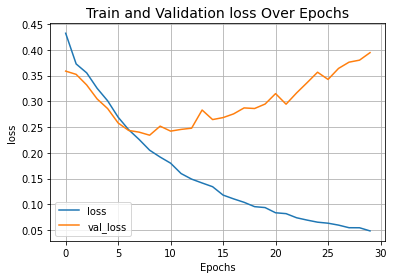

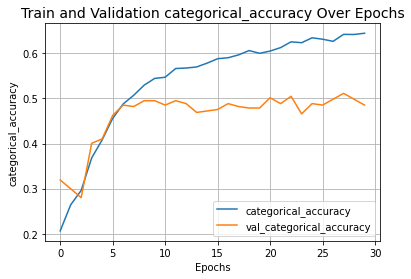

In [ ]:
plot_result(history,"loss")
plot_result(history,"categorical_accuracy")

In [ ]:
x_test

array([[  58,   21,   28, ...,    0,    0,    0],
       [   2,  321,    8, ...,    0,    0,    0],
       [  21,   17,    3, ...,    0,    0,    0],
       ...,
       [   5,   40,    2, ...,    0,    0,    0],
       [ 176, 4434, 3558, ...,    0,    0,    0],
       [  48, 3784,   34, ...,    0,    0,    0]])

In [ ]:
y_pred = topic_classifier.predict(x_test)

In [ ]:
y_pred[0]

array([1.0712808e-12, 9.9999970e-01, 5.2660704e-04, 6.6914616e-09,
       2.1239641e-08, 4.9156505e-08, 3.8790703e-04, 2.8941474e-06,
       2.4050474e-04, 2.0521879e-04, 3.0828571e-05, 4.4367698e-07],
      dtype=float32)

In [ ]:
_, categorical_acc = topic_classifier.evaluate(x_test,y_test)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

10/10 [==============================] - 0s 22ms/step - loss: 0.3479 - categorical_accuracy: 0.5114
Categorical accuracy on the test set: 51.14%.


**Predict Sentiment**

In [ ]:
sentiment_classifier.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)
history_sentiment = sentiment_classifier.fit(x_train, y_train_senti, batch_size=128, epochs=30, validation_data=(x_val, y_val_senti))

Epoch 1/30
44/44 [==============================] - 14s 295ms/step - loss: 0.5167 - accuracy: 0.7648 - val_loss: 0.4362 - val_accuracy: 0.7622
Epoch 2/30
44/44 [==============================] - 10s 223ms/step - loss: 0.3796 - accuracy: 0.8142 - val_loss: 0.3287 - val_accuracy: 0.8436
Epoch 3/30
44/44 [==============================] - 10s 237ms/step - loss: 0.3123 - accuracy: 0.8616 - val_loss: 0.3419 - val_accuracy: 0.8274
Epoch 4/30
44/44 [==============================] - 14s 322ms/step - loss: 0.2386 - accuracy: 0.8986 - val_loss: 0.3202 - val_accuracy: 0.8534
Epoch 5/30
44/44 [==============================] - 15s 333ms/step - loss: 0.2034 - accuracy: 0.9149 - val_loss: 0.3090 - val_accuracy: 0.8567
Epoch 6/30
44/44 [==============================] - 14s 329ms/step - loss: 0.1175 - accuracy: 0.9560 - val_loss: 0.3375 - val_accuracy: 0.8893
Epoch 7/30
44/44 [==============================] - 14s 307ms/step - loss: 0.0702 - accuracy: 0.9730 - val_loss: 0.3719 - val_accuracy: 0.8795

**Create Submission**

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit = vectorizer(np.array([[s] for s in submit_features])).numpy()

Topics

In [ ]:
predicted_topics = topic_classifier(x_submit)
print(predicted_topics[0])

tf.Tensor(
[2.7610058e-01 4.9569145e-01 8.6827327e-05 1.2698619e-05 1.3389135e-06
 1.7460316e-02 4.2298587e-05 8.3241463e-03 9.6007170e-06 9.2454565e-01
 5.5679045e-10], shape=(11,), dtype=float32)


Sentiment

In [ ]:
predicted_sentiments = sentiment_classifier(x_submit)
print(predicted_sentiments[0])

tf.Tensor([2.7003393e-08], shape=(1,), dtype=float32)


**Save Models**

In [ ]:
topic_classifier.save('topic_cl.h5')
sentiment_classifier.save('senti_cl.h5')

**Submission**

In [ ]:
for i in predicted_topics:
  print(tf.keras.backend.get_value(i))
  break

[2.7610058e-01 4.9569145e-01 8.6827327e-05 1.2698619e-05 1.3389135e-06
 1.7460316e-02 4.2298587e-05 8.3241463e-03 9.6007170e-06 9.2454565e-01
 5.5679045e-10]


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...     Usability      Polarity
0    0.276101                   4.956914e-01  ...  5.567904e-10  2.700339e-08
1    0.000100                   2.614006e-06  ...  4.590725e-12  9.998587e-01
2    0.000157                   2.971426e-09  ...  9.999023e-01  1.000000e+00

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 2 : Score : 3.8614

Initially I got a score of around 4.8 with 5 Epochs with this model.
On increasing the no of epochs to 30, I got an increase in log loss and thus rank improved. Yaayyy 

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.LSTM(256,return_sequences=True))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.LSTM(128))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.LSTM(256,return_sequences=True))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.LSTM(128))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6911 words (1564 misses)
Review :  [  31  136   31  176  558  175   11   32   17   89    2 3063 7874 6930
  102  135    4    2   80  102   12    2  109  541 6839   79    6  159
  328   28   35  214    3 2550    7   42    4   22    2 5145    3 1510
 6420    0    0    0    0    0    0    0]
Topic :  [0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = add_embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 100)           847700    
                                                                 
 lstm_15 (LSTM)              (None, 50, 256)           365568    
                                                                 
 dropout_3 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_16 (LSTM)              (None, 128)               197120    
                                                                 
 dense_18 (Dense)            (None, 11)                1419      
                                                                 
Total params: 1,411,807
Trainable params: 564,107
Non-trainable params: 847,700
_________________________________________________________________


In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
87/87 [==============================] - 42s 445ms/step - loss: 0.3756 - acc: 0.2885 - val_loss: 0.3599 - val_acc: 0.3550
Epoch 2/30
87/87 [==============================] - 38s 435ms/step - loss: 0.3593 - acc: 0.3071 - val_loss: 0.3594 - val_acc: 0.3388
Epoch 3/30
87/87 [==============================] - 38s 433ms/step - loss: 0.3583 - acc: 0.2945 - val_loss: 0.3574 - val_acc: 0.3550
Epoch 4/30
87/87 [==============================] - 38s 437ms/step - loss: 0.3576 - acc: 0.2975 - val_loss: 0.3563 - val_acc: 0.3257
Epoch 5/30
87/87 [==============================] - 38s 440ms/step - loss: 0.3569 - acc: 0.2974 - val_loss: 0.3567 - val_acc: 0.3485
Epoch 6/30
87/87 [==============================] - 39s 443ms/step - loss: 0.3567 - acc: 0.3062 - val_loss: 0.3557 - val_acc: 0.2508
Epoch 7/30
87/87 [==============================] - 39s 449ms/step - loss: 0.3551 - acc: 0.2993 - val_loss: 0.3544 - val_acc: 0.3388
Epoch 8/30
87/87 [==============================] - 39s 443ms/step - 

In [ ]:
model_topic.save('topic_cl_2.h5')

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6935 words (1594 misses)
Review :  [   2  186    8  332    2  181    8  164   22    2  253  453  318 1109
    5  367  154  253   71  118    6  149  708   21   65  100   42  253
  903    4   49   35  600   11   33    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = add_embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 100)           853100    
                                                                 
 lstm_17 (LSTM)              (None, 50, 256)           365568    
                                                                 
 dropout_4 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_18 (LSTM)              (None, 128)               197120    
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,415,917
Trainable params: 562,817
Non-trainable params: 853,100
_________________________________________________________________


In [ ]:
#sentiment_classifier_data['VALIDATION_SET'][1]

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
87/87 [==============================] - 45s 439ms/step - loss: 0.5301 - accuracy: 0.7720 - val_loss: 0.4784 - val_accuracy: 0.7720
Epoch 2/30
87/87 [==============================] - 39s 443ms/step - loss: 0.4986 - accuracy: 0.7744 - val_loss: 0.4070 - val_accuracy: 0.7720
Epoch 3/30
87/87 [==============================] - 39s 449ms/step - loss: 0.4374 - accuracy: 0.7905 - val_loss: 0.3835 - val_accuracy: 0.7752
Epoch 4/30
87/87 [==============================] - 39s 444ms/step - loss: 0.4126 - accuracy: 0.8060 - val_loss: 0.3552 - val_accuracy: 0.8469
Epoch 5/30
87/87 [==============================] - 38s 441ms/step - loss: 0.3541 - accuracy: 0.8443 - val_loss: 0.3324 - val_accuracy: 0.8306
Epoch 6/30
87/87 [==============================] - 38s 440ms/step - loss: 0.3200 - accuracy: 0.8584 - val_loss: 0.2846 - val_accuracy: 0.8795
Epoch 7/30
87/87 [==============================] - 39s 447ms/step - loss: 0.2958 - accuracy: 0.8711 - val_loss: 0.2757 - val_accuracy: 0.8925

**Create Submission**

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

Topics

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[3.7886918e-02 6.6594183e-02 1.3202226e-01 3.7398487e-01 3.2455623e-03
 1.3009906e-02 1.0014907e-04 6.8978196e-01 5.7422101e-02 6.1964631e-01
 1.2106359e-02], shape=(11,), dtype=float32)


Sentiment

In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.00245032], shape=(1,), dtype=float32)


**Save Models**

In [ ]:
model_topic.save('topic_r85.h5')
model_senti.save('senti_r85.h5')

**Submission**

In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.037887                       0.066594  ...   0.012106  0.002450
1    0.006244                       0.021313  ...   0.002603  0.993088
2    0.039912                       0.000422  ...   0.996602  0.999859

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 3: Score - 3.61

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(25,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  #model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(25,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6862 words (1577 misses)
Review :  [   5 1285    3  574   11  174 1331   79   30  411   10    2 1887 1751
 1501   11    8    6  871  549  431 1064  122   79  108   28   47   38
 1443    3 1103   15   18   11   79   24   48  571    2  220    3  272
    2   38  278    5  322    2   79    3]
Topic :  [0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 100)           844100    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 50, 25)            12600     
                                                                 
 batch_normalization_6 (Batc  (None, 50, 25)           100       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 50, 25)            0         
                                                                 
 global_max_pooling1d_6 (Glo  (None, 25)              

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['acc'])

model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=40, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/40
87/87 [==============================] - 5s 35ms/step - loss: 0.3769 - acc: 0.2818 - val_loss: 0.4979 - val_acc: 0.3681
Epoch 2/40
87/87 [==============================] - 3s 29ms/step - loss: 0.3281 - acc: 0.3446 - val_loss: 0.4616 - val_acc: 0.3909
Epoch 3/40
87/87 [==============================] - 3s 30ms/step - loss: 0.2986 - acc: 0.4017 - val_loss: 0.3935 - val_acc: 0.4169
Epoch 4/40
87/87 [==============================] - 3s 29ms/step - loss: 0.2787 - acc: 0.4277 - val_loss: 0.3304 - val_acc: 0.4104
Epoch 5/40
87/87 [==============================] - 3s 31ms/step - loss: 0.2697 - acc: 0.4310 - val_loss: 0.3035 - val_acc: 0.4723
Epoch 6/40
87/87 [==============================] - 3s 29ms/step - loss: 0.2589 - acc: 0.4488 - val_loss: 0.2909 - val_acc: 0.4397
Epoch 7/40
87/87 [==============================] - 3s 30ms/step - loss: 0.2541 - acc: 0.4573 - val_loss: 0.2727 - val_acc: 0.4267
Epoch 8/40
87/87 [==============================] - 3s 31ms/step - loss: 0.2518 - a

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6923 words (1558 misses)
Review :  [  20   29   86   21   92  284   76   47  583    3   75  235  931    4
 2182  982    3  137   90  169  839  858  435 1909    4  151  570  193
 2236  594  176   73    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 100)           848300    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 50, 25)            12600     
                                                                 
 batch_normalization_7 (Batc  (None, 50, 25)           100       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 50, 25)            0         
                                                                 
 global_max_pooling1d_7 (Glo  (None, 25)              

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=40, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/40
87/87 [==============================] - 7s 38ms/step - loss: 0.5075 - accuracy: 0.7669 - val_loss: 0.5667 - val_accuracy: 0.7980
Epoch 2/40
87/87 [==============================] - 2s 29ms/step - loss: 0.4058 - accuracy: 0.8070 - val_loss: 0.4822 - val_accuracy: 0.7980
Epoch 3/40
87/87 [==============================] - 2s 28ms/step - loss: 0.3737 - accuracy: 0.8283 - val_loss: 0.4175 - val_accuracy: 0.8893
Epoch 4/40
87/87 [==============================] - 3s 29ms/step - loss: 0.3485 - accuracy: 0.8419 - val_loss: 0.3353 - val_accuracy: 0.8795
Epoch 5/40
87/87 [==============================] - 3s 30ms/step - loss: 0.3318 - accuracy: 0.8452 - val_loss: 0.3319 - val_accuracy: 0.8795
Epoch 6/40
87/87 [==============================] - 3s 30ms/step - loss: 0.3220 - accuracy: 0.8504 - val_loss: 0.3153 - val_accuracy: 0.8925
Epoch 7/40
87/87 [==============================] - 3s 29ms/step - loss: 0.3140 - accuracy: 0.8584 - val_loss: 0.2878 - val_accuracy: 0.8893
Epoch 8/40
87

**Create Submission**

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

Topics

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.12946883 0.0789845  0.12463823 0.14724904 0.05259955 0.20988733
 0.03593349 0.12158164 0.06710431 0.45628798 0.07732785], shape=(11,), dtype=float32)


Sentiment

In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.19265056], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.129469                       0.078984  ...   0.077328  0.192651
1    0.051470                       0.016090  ...   0.036099  0.960775
2    0.027207                       0.022883  ...   0.930852  0.972423

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 4 : 3.515 ( 200D Embeddings + 60 Epochs + MAX SEQ LENGTH 100 )

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(25,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  #model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(25,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6783 words (486 misses)
Review :  [11 38  4 19 15  3 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
Topic :  [0 0 0 0 0 0 0 0 0 1 1]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          1454200   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100, 25)           22600     
                                                                 
 batch_normalization_1 (Batc  (None, 100, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100, 25)           0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 25)              

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['acc'])

history_topic = model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=60, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/60
87/87 [==============================] - 9s 74ms/step - loss: 0.3661 - acc: 0.2847 - val_loss: 0.4403 - val_acc: 0.3420
Epoch 2/60
87/87 [==============================] - 6s 67ms/step - loss: 0.3028 - acc: 0.3573 - val_loss: 0.4052 - val_acc: 0.3160
Epoch 3/60
87/87 [==============================] - 6s 67ms/step - loss: 0.2644 - acc: 0.4352 - val_loss: 0.3296 - val_acc: 0.4137
Epoch 4/60
87/87 [==============================] - 6s 67ms/step - loss: 0.2418 - acc: 0.4638 - val_loss: 0.2965 - val_acc: 0.4528
Epoch 5/60
87/87 [==============================] - 6s 67ms/step - loss: 0.2347 - acc: 0.4674 - val_loss: 0.2627 - val_acc: 0.4919
Epoch 6/60
87/87 [==============================] - 6s 68ms/step - loss: 0.2307 - acc: 0.4752 - val_loss: 0.2646 - val_acc: 0.4593
Epoch 7/60
87/87 [==============================] - 6s 67ms/step - loss: 0.2244 - acc: 0.4701 - val_loss: 0.2448 - val_acc: 0.4984
Epoch 8/60
87/87 [==============================] - 6s 66ms/step - loss: 0.2189 - a

40 Epochs


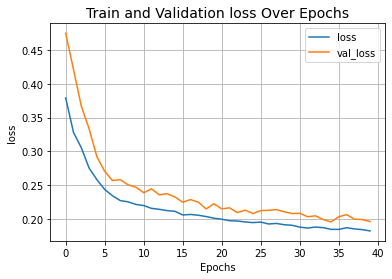

In [ ]:
#Plot Results
print('40 Epochs')
plot_result(history_topic,"loss")

60 Epochs


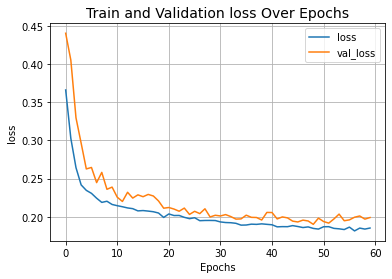

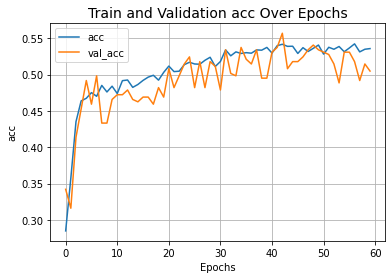

In [ ]:
#Plot Results
print('60 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"acc")

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X')

Number of rows in training set: 5522
Number of rows in validation set: 307
Number of rows in test set: 307
Found 400000 word vectors.
Converted 6807 words (488 misses)
Review :  [  11   81    7    2  137   20  313    8   30  192    4   20   35   45
  290   55 1362    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 200)          1459400   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100, 25)           22600     
                                                                 
 batch_normalization_2 (Batc  (None, 100, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 100, 25)           0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)              

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

history_senti = model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=60, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/60
87/87 [==============================] - 10s 74ms/step - loss: 0.4866 - accuracy: 0.7934 - val_loss: 0.5429 - val_accuracy: 0.8762
Epoch 2/60
87/87 [==============================] - 6s 68ms/step - loss: 0.3571 - accuracy: 0.8319 - val_loss: 0.3743 - val_accuracy: 0.8958
Epoch 3/60
87/87 [==============================] - 6s 68ms/step - loss: 0.3120 - accuracy: 0.8598 - val_loss: 0.2972 - val_accuracy: 0.8632
Epoch 4/60
87/87 [==============================] - 6s 69ms/step - loss: 0.2969 - accuracy: 0.8647 - val_loss: 0.2899 - val_accuracy: 0.9121
Epoch 5/60
87/87 [==============================] - 6s 68ms/step - loss: 0.2688 - accuracy: 0.8836 - val_loss: 0.2566 - val_accuracy: 0.9088
Epoch 6/60
87/87 [==============================] - 6s 67ms/step - loss: 0.2637 - accuracy: 0.8855 - val_loss: 0.2240 - val_accuracy: 0.9283
Epoch 7/60
87/87 [==============================] - 6s 68ms/step - loss: 0.2525 - accuracy: 0.8868 - val_loss: 0.2585 - val_accuracy: 0.9121
Epoch 8/60
8

60 Epochs


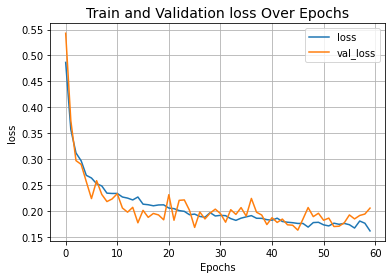

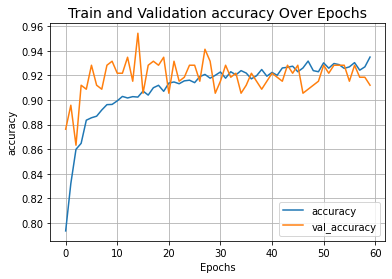

In [ ]:
#Plot Results
print('60 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

**Create Submission**

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

Topics

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.11403617 0.04048014 0.05328739 0.08044177 0.04027405 0.12169087
 0.03925338 0.03475949 0.01864472 0.75405955 0.0817796 ], shape=(11,), dtype=float32)


In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.03061572], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.114036                       0.040480  ...   0.081780  0.030616
1    0.033235                       0.020973  ...   0.036895  0.953958
2    0.025087                       0.016165  ...   0.824556  0.971946

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 5 : 3.51280 ( 200D Embeddings + 60 Epochs + MAX SEQ LENGTH 50 + LSTM(128))

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(128,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  #model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(128,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='',no_test='X')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Found 400000 word vectors.
Converted 6950 words (510 misses)
Review :  [  9  85 129 199 353  51 177 533 945   7 929   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Topic :  [0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 200)           1492400   
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 50, 200)          0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 50, 128)           168448    
                                                                 
 batch_normalization_8 (Batc  (None, 50, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 50, 128)           0         
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)             

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['acc'])

history_topic = model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 15s 140ms/step - loss: 0.3510 - acc: 0.3390 - val_loss: 0.4580 - val_acc: 0.5000
Epoch 2/30
92/92 [==============================] - 12s 134ms/step - loss: 0.2667 - acc: 0.4454 - val_loss: 0.3740 - val_acc: 0.5260
Epoch 3/30
92/92 [==============================] - 12s 134ms/step - loss: 0.2426 - acc: 0.4728 - val_loss: 0.3044 - val_acc: 0.5325
Epoch 4/30
92/92 [==============================] - 12s 133ms/step - loss: 0.2268 - acc: 0.4946 - val_loss: 0.2768 - val_acc: 0.5519
Epoch 5/30
92/92 [==============================] - 12s 134ms/step - loss: 0.2163 - acc: 0.5109 - val_loss: 0.2453 - val_acc: 0.5714
Epoch 6/30
92/92 [==============================] - 12s 134ms/step - loss: 0.2099 - acc: 0.5178 - val_loss: 0.2345 - val_acc: 0.5779
Epoch 7/30
92/92 [==============================] - 12s 134ms/step - loss: 0.2037 - acc: 0.5294 - val_loss: 0.2204 - val_acc: 0.6234
Epoch 8/30
92/92 [==============================] - 12s 134ms/step - 

60 Epochs


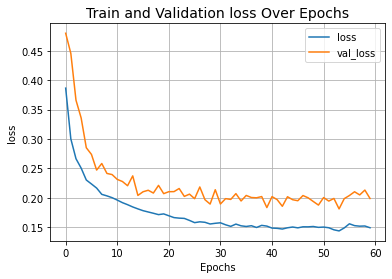

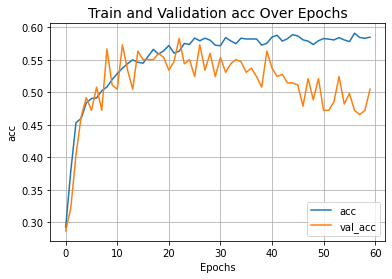

In [ ]:
#Plot Results
print('60 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"acc")

10 Epochs


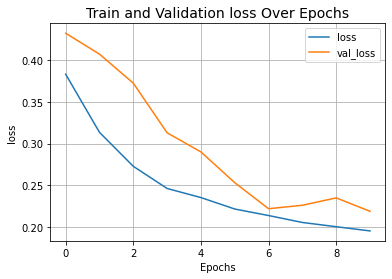

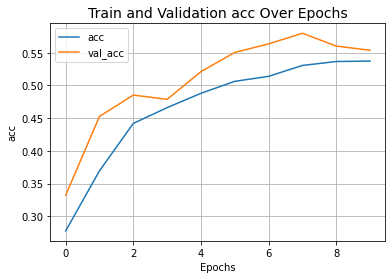

In [ ]:
#Plot Results
print('10 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"acc")

30 Epochs


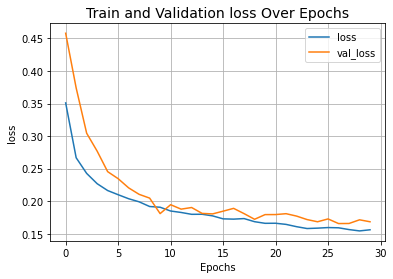

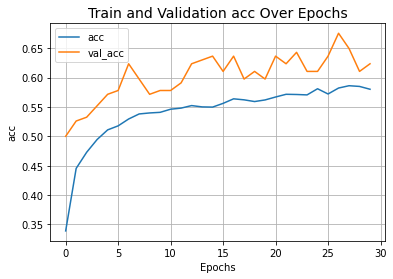

In [ ]:
#Plot Results
print('30 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"acc")

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X',no_test='X')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Found 400000 word vectors.
Converted 6953 words (505 misses)
Review :  [ 56  28 674  14  19 772   7  12 301  53  14 155   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 200)           1492000   
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 50, 200)          0         
 lDropout1D)                                                     
                                                                 
 lstm_9 (LSTM)               (None, 50, 128)           168448    
                                                                 
 batch_normalization_9 (Batc  (None, 50, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 50, 128)           0         
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)             

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

history_senti = model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 16s 138ms/step - loss: 0.5758 - accuracy: 0.7699 - val_loss: 0.5565 - val_accuracy: 0.8247
Epoch 2/30
92/92 [==============================] - 12s 131ms/step - loss: 0.3809 - accuracy: 0.8115 - val_loss: 0.4748 - val_accuracy: 0.8377
Epoch 3/30
92/92 [==============================] - 12s 131ms/step - loss: 0.3477 - accuracy: 0.8458 - val_loss: 0.3446 - val_accuracy: 0.8571
Epoch 4/30
92/92 [==============================] - 12s 132ms/step - loss: 0.3264 - accuracy: 0.8552 - val_loss: 0.3666 - val_accuracy: 0.8831
Epoch 5/30
92/92 [==============================] - 12s 131ms/step - loss: 0.3014 - accuracy: 0.8679 - val_loss: 0.2493 - val_accuracy: 0.8961
Epoch 6/30
92/92 [==============================] - 12s 132ms/step - loss: 0.2839 - accuracy: 0.8773 - val_loss: 0.2245 - val_accuracy: 0.9156
Epoch 7/30
92/92 [==============================] - 12s 131ms/step - loss: 0.2587 - accuracy: 0.8878 - val_loss: 0.2428 - val_accuracy: 0.9156

60 Epochs


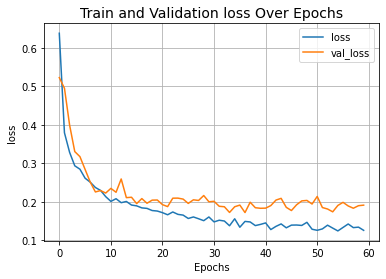

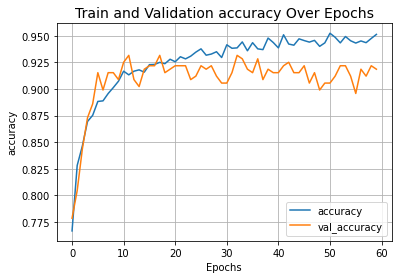

In [ ]:
#Plot Results
print('60 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

10 Epochs


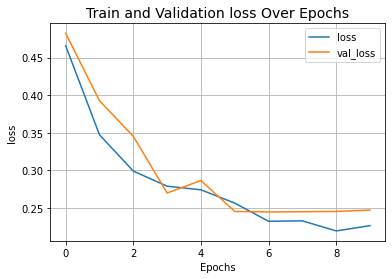

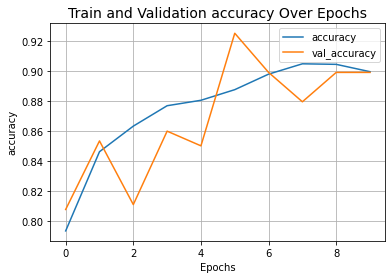

In [ ]:
#Plot Results
print('10 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

30 Epochs


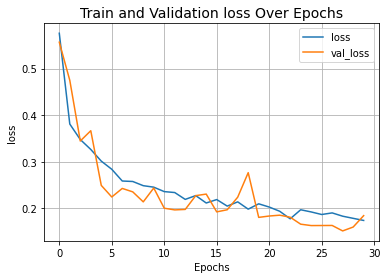

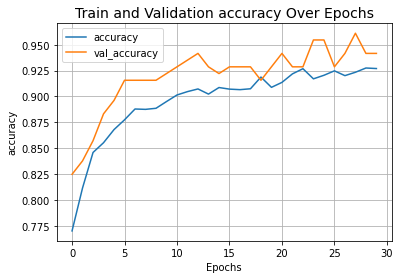

In [ ]:
#Plot Results
print('30 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.21264926 0.07928368 0.06921369 0.1692661  0.02940288 0.04650965
 0.08160818 0.46689403 0.050396   0.719745   0.07657534], shape=(11,), dtype=float32)


In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.00512612], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.212649                       0.079284  ...   0.076575  0.005126
1    0.110388                       0.016152  ...   0.083049  0.875390
2    0.103066                       0.001423  ...   0.962984  0.987708

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 6: word2Vec : 3.50145

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(25,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  #model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.LSTM(128,return_sequences=True))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='',no_test='X',embd='word2vec')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Review :  [2525    9   66    6  420    2   30  282 6846 6528   51    2 6113   18
  301  166    2 2167   13  104  282 3373    9  212  262   53    7    2
   77  890    3   34   99   48   14  877   59   20  143  299  108   57
  291   13   12   93  632   10 1244 1281]
Topic :  [0 0 0 0 0 0 1 0 1 0 0]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 300)           2228100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 300)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50, 25)            32600     
                                                                 
 batch_normalization (BatchN  (None, 50, 25)           100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['acc'])

history_topic = model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 7s 50ms/step - loss: 0.3763 - acc: 0.2798 - val_loss: 0.4072 - val_acc: 0.3506
Epoch 2/30
92/92 [==============================] - 4s 43ms/step - loss: 0.3045 - acc: 0.3790 - val_loss: 0.3611 - val_acc: 0.3377
Epoch 3/30
92/92 [==============================] - 4s 42ms/step - loss: 0.2710 - acc: 0.4539 - val_loss: 0.3072 - val_acc: 0.4675
Epoch 4/30
92/92 [==============================] - 4s 43ms/step - loss: 0.2419 - acc: 0.5001 - val_loss: 0.2634 - val_acc: 0.5974
Epoch 5/30
92/92 [==============================] - 4s 42ms/step - loss: 0.2226 - acc: 0.5169 - val_loss: 0.2442 - val_acc: 0.5260
Epoch 6/30
92/92 [==============================] - 4s 42ms/step - loss: 0.2135 - acc: 0.5227 - val_loss: 0.2307 - val_acc: 0.5519
Epoch 7/30
92/92 [==============================] - 4s 42ms/step - loss: 0.2059 - acc: 0.5361 - val_loss: 0.2122 - val_acc: 0.5714
Epoch 8/30
92/92 [==============================] - 4s 43ms/step - loss: 0.2061 - a

30 Epochs


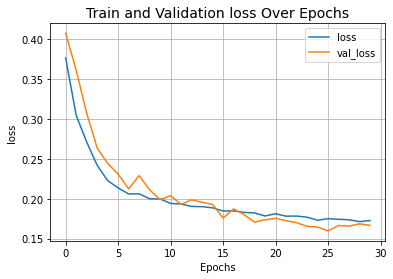

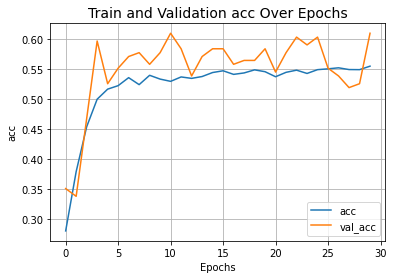

In [ ]:
#Plot Results
print('30 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"acc")

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X',no_test='X',embd='word2vec')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Review :  [  60  111   78   16 4980  253   13 1303 3075  195  165   17  588 2222
   56  629   35    3  469  317    8   78    3  521   54 1024    4    5
   14   17   15   23  568   19   25    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 300)           2239200   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 50, 300)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 50, 128)           219648    
                                                                 
 batch_normalization_3 (Batc  (None, 50, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 50, 128)           0         
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)             

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

history_senti = model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 17s 157ms/step - loss: 0.5239 - accuracy: 0.7790 - val_loss: 0.5000 - val_accuracy: 0.7532
Epoch 2/30
92/92 [==============================] - 14s 150ms/step - loss: 0.3427 - accuracy: 0.8459 - val_loss: 0.3966 - val_accuracy: 0.7922
Epoch 3/30
92/92 [==============================] - 14s 152ms/step - loss: 0.3111 - accuracy: 0.8619 - val_loss: 0.3997 - val_accuracy: 0.8506
Epoch 4/30
92/92 [==============================] - 14s 151ms/step - loss: 0.2695 - accuracy: 0.8796 - val_loss: 0.3176 - val_accuracy: 0.8636
Epoch 5/30
92/92 [==============================] - 14s 151ms/step - loss: 0.2501 - accuracy: 0.8923 - val_loss: 0.3033 - val_accuracy: 0.8896
Epoch 6/30
92/92 [==============================] - 14s 152ms/step - loss: 0.2275 - accuracy: 0.9005 - val_loss: 0.2739 - val_accuracy: 0.8896
Epoch 7/30
92/92 [==============================] - 14s 152ms/step - loss: 0.2221 - accuracy: 0.9110 - val_loss: 0.2782 - val_accuracy: 0.8636

30 Epochs


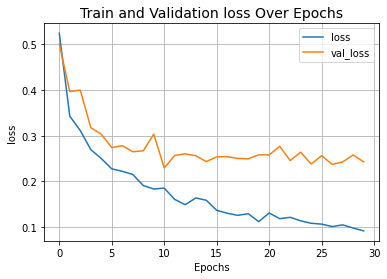

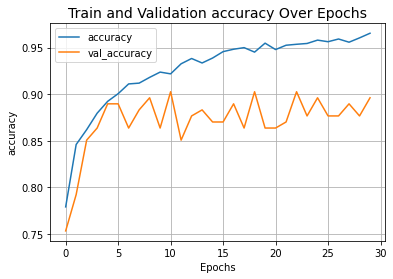

In [ ]:
#Plot Results
print('30 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.0898495  0.1254209  0.10314706 0.23953253 0.06100535 0.08122715
 0.04065299 0.14514396 0.05455986 0.383182   0.04709259], shape=(11,), dtype=float32)


In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.01040018], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.089850                       0.125421  ...   0.047093  0.010400
1    0.039561                       0.019201  ...   0.036829  0.988059
2    0.017362                       0.010552  ...   0.894253  0.905068

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 7: BiDirectional LSTM ( 3.41541 )

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25,return_sequences=True)))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  #model.add(tf.keras.layers.SimpleRNN(100))
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  #model.add(tf.keras.layers.Dense(128, activation="relu"))
  #model.add(tf.keras.layers.Dense(64, activation="relu"))
  #model.add(tf.keras.layers.Dense(11, activation='sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.5))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25,return_sequences=True)))
  model.add(tf.keras.layers.BatchNormalization()),
  model.add(tf.keras.layers.Dropout(0.5)),
  model.add(tf.keras.layers.GlobalMaxPool1D()),
  #model.add(tf.keras.layers.SimpleRNN(100))
  model.add(tf.keras.layers.Dense(50, activation = 'relu')),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='',no_test='X',embd='word2vec')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Review :  [  52   21   68    2  759 3900 3645 1080   57  257   10    2  736    4
   54   52  651    9 1439  963   52  288   52  182  415    5  369    5
  204   43  229    4    6   93  220    3   98  160    2   57   63    2
  759   31 1084  113   21    3   99  152]
Topic :  [0 0 0 0 0 0 0 0 0 1 1]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 300)           2237700   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 50, 300)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 50)           65200     
 l)                                                              
                                                                 
 batch_normalization_4 (Batc  (None, 50, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                      

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])

history_topic = model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 12s 83ms/step - loss: 0.3438 - accuracy: 0.3157 - val_loss: 0.4433 - val_accuracy: 0.3831
Epoch 2/30
92/92 [==============================] - 7s 73ms/step - loss: 0.2742 - accuracy: 0.4330 - val_loss: 0.3550 - val_accuracy: 0.4351
Epoch 3/30
92/92 [==============================] - 7s 72ms/step - loss: 0.2439 - accuracy: 0.4831 - val_loss: 0.2948 - val_accuracy: 0.4870
Epoch 4/30
92/92 [==============================] - 7s 73ms/step - loss: 0.2242 - accuracy: 0.5136 - val_loss: 0.2571 - val_accuracy: 0.5260
Epoch 5/30
92/92 [==============================] - 7s 73ms/step - loss: 0.2088 - accuracy: 0.5208 - val_loss: 0.2241 - val_accuracy: 0.5909
Epoch 6/30
92/92 [==============================] - 7s 73ms/step - loss: 0.2046 - accuracy: 0.5263 - val_loss: 0.2101 - val_accuracy: 0.6104
Epoch 7/30
92/92 [==============================] - 7s 72ms/step - loss: 0.1971 - accuracy: 0.5341 - val_loss: 0.2080 - val_accuracy: 0.5974
Epoch 8/30
9

30 Epochs


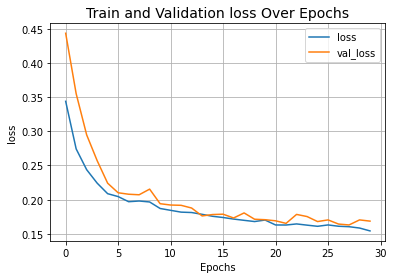

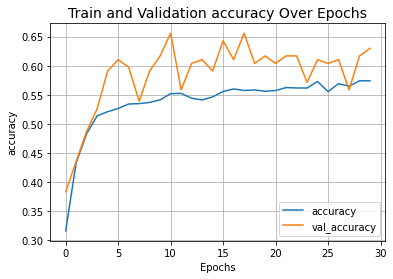

In [ ]:
#Plot Results
print('30 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"accuracy")

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X',no_test='X',embd='word2vec')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Review :  [27 51 11 86  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 50, 300)           2237400   
                                                                 
 spatial_dropout1d_13 (Spati  (None, 50, 300)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_8 (Bidirectio  (None, 50, 50)           65200     
 nal)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 50, 50)           200       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 50, 50)            0         
                                                     

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"])

history_senti = model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=30, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/30
92/92 [==============================] - 13s 87ms/step - loss: 0.4353 - accuracy: 0.7969 - val_loss: 0.4987 - val_accuracy: 0.7857
Epoch 2/30
92/92 [==============================] - 7s 77ms/step - loss: 0.3352 - accuracy: 0.8494 - val_loss: 0.4259 - val_accuracy: 0.8117
Epoch 3/30
92/92 [==============================] - 7s 77ms/step - loss: 0.2951 - accuracy: 0.8669 - val_loss: 0.3726 - val_accuracy: 0.8506
Epoch 4/30
92/92 [==============================] - 7s 77ms/step - loss: 0.2777 - accuracy: 0.8797 - val_loss: 0.3435 - val_accuracy: 0.8571
Epoch 5/30
92/92 [==============================] - 7s 77ms/step - loss: 0.2610 - accuracy: 0.8820 - val_loss: 0.2980 - val_accuracy: 0.8831
Epoch 6/30
92/92 [==============================] - 7s 76ms/step - loss: 0.2455 - accuracy: 0.8899 - val_loss: 0.2813 - val_accuracy: 0.8961
Epoch 7/30
92/92 [==============================] - 7s 76ms/step - loss: 0.2335 - accuracy: 0.8972 - val_loss: 0.2642 - val_accuracy: 0.8701
Epoch 8/30
9

30 Epochs   Bi Directional -- 64


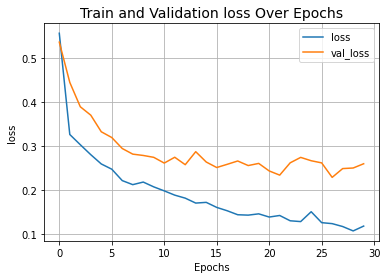

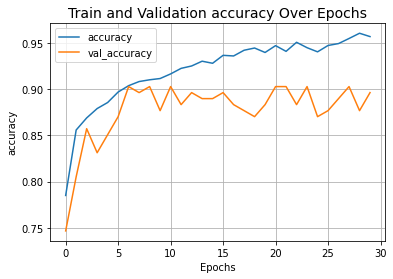

In [ ]:
#Plot Results
print('30 Epochs', '  Bi Directional -- 64')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

30 Epochs   Bi Directional -- 25


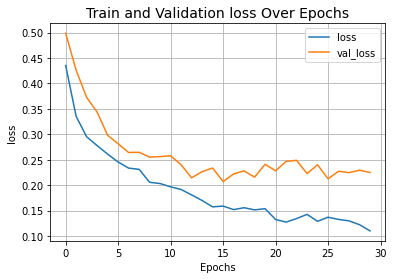

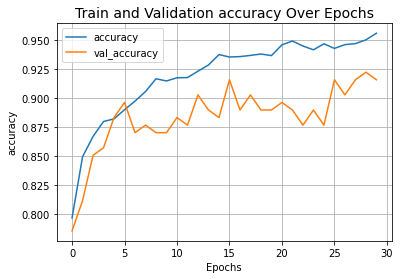

In [ ]:
#Plot Results
print('30 Epochs', '  Bi Directional -- 25')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.17259583 0.10594928 0.1737062  0.11796004 0.0292879  0.06240961
 0.00340238 0.26839423 0.02191865 0.73161775 0.04359266], shape=(11,), dtype=float32)


In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.03567836], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.172596                       0.105949  ...   0.043593  0.035678
1    0.047128                       0.033831  ...   0.006702  0.972759
2    0.007160                       0.001379  ...   0.953567  0.999900

[3 rows x 12 columns]
Final Length :  2631
File Saved !


# TEST 8 : 3.36709 ( LSTM + GRU )

In [ ]:
def embedding_layer(model,embedding_matrix):
  #model.add(tf.keras.layers.Input(shape=(MAX_SEQ_LEN,)))
  model.add(tf.keras.layers.Embedding(
      input_dim =embedding_matrix.shape[0], 
      input_length=MAX_SEQ_LEN, 
      output_dim=embedding_matrix.shape[1],
      weights=[embedding_matrix], 
      trainable=False))
  
  return (model)

In [ ]:
def add_topic_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.2))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)))
  #model.add(tf.keras.layers.GlobalMaxPool1D())
  #model.add(tf.keras.layers.GlobalMaxPool1D())
  model.add(tf.keras.layers.Dense(50, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2)),
  model.add(tf.keras.layers.Dense(11, activation = 'sigmoid'))
  
  return model

In [ ]:
def add_sentiment_classifier(model):
  model.add(tf.keras.layers.SpatialDropout1D(0.3))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)))
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)))
  #model.add(tf.keras.layers.GlobalMaxPool1D())
  #model.add(tf.keras.layers.GlobalMaxPool1D())
  model.add(tf.keras.layers.Dense(50, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.3)),
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
  
  return model

In [ ]:
topic_classifier_data = get_features_and_labels(df_train_new,is_sentiment='',no_test='X')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Found 400000 word vectors.
Converted 6921 words (505 misses)
Review :  [  19   83   41   63 3010  480    7  291    8  422   78  209 1581  696
   13  422    6  962  108   89  180 2746    4  460    7  130   19  236
   38   41   53  172   46   13   30  422   16  272 6636 6768    4    2
   91  422   16 1605  332    0    0    0]
Topic :  [0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
# Topic Classifier
model_topic = tf.keras.Sequential()
model_topic = embedding_layer(model_topic,topic_classifier_data['EMBEDDING_MATRIX'])   
model_topic = add_topic_classifier(model_topic)
model_topic.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 50, 200)           1485600   
                                                                 
 spatial_dropout1d_19 (Spati  (None, 50, 200)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_19 (Bidirecti  (None, 50, 512)          935936    
 onal)                                                           
                                                                 
 bidirectional_20 (Bidirecti  (None, 256)              493056    
 onal)                                                           
                                                                 
 dense_34 (Dense)            (None, 50)                12850     
                                                     

In [ ]:
# Compile the Model
model_topic.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

history_topic = model_topic.fit(
    topic_classifier_data['TRAINING_SET'][0], 
    topic_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=10, 
    validation_data=(
        topic_classifier_data['VALIDATION_SET'][0], 
        topic_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/10
92/92 [==============================] - 80s 788ms/step - loss: 0.3883 - accuracy: 0.2632 - val_loss: 0.3150 - val_accuracy: 0.3377
Epoch 2/10
92/92 [==============================] - 73s 788ms/step - loss: 0.2990 - accuracy: 0.4121 - val_loss: 0.2511 - val_accuracy: 0.4351
Epoch 3/10
92/92 [==============================] - 71s 766ms/step - loss: 0.2589 - accuracy: 0.4682 - val_loss: 0.2167 - val_accuracy: 0.4740
Epoch 4/10
92/92 [==============================] - 73s 788ms/step - loss: 0.2298 - accuracy: 0.4970 - val_loss: 0.1991 - val_accuracy: 0.4805
Epoch 5/10
92/92 [==============================] - 73s 789ms/step - loss: 0.2087 - accuracy: 0.5229 - val_loss: 0.1767 - val_accuracy: 0.5455
Epoch 6/10
92/92 [==============================] - 73s 794ms/step - loss: 0.1899 - accuracy: 0.5421 - val_loss: 0.1705 - val_accuracy: 0.5260
Epoch 7/10
92/92 [==============================] - 72s 784ms/step - loss: 0.1746 - accuracy: 0.5541 - val_loss: 0.1580 - val_accuracy: 0.5325

10 Epochs


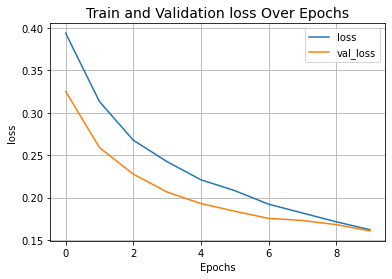

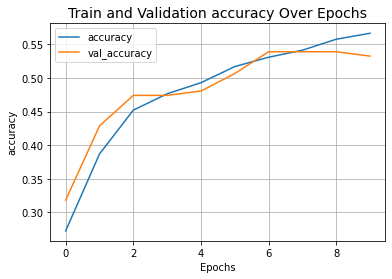

In [ ]:
#Plot Results --- GRU
print('10 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"accuracy")

10 Epochs


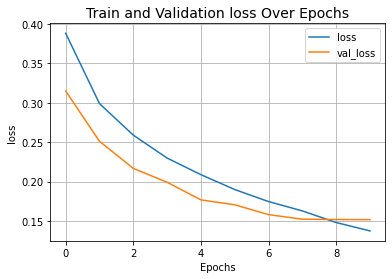

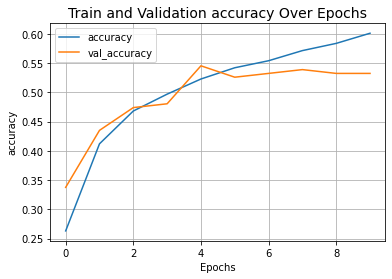

In [ ]:
#Plot Results --- GRU + LSTM
print('10 Epochs')
plot_result(history_topic,"loss")
plot_result(history_topic,"accuracy")

In [ ]:
sentiment_classifier_data = get_features_and_labels(df_train_new,is_sentiment='X',no_test='X')

Number of rows in training set: 5829
Number of rows in validation set: 154
Number of rows in test set: 153
Found 400000 word vectors.
Converted 6948 words (510 misses)
Review :  [ 15   3  50 480   6  25  68   4   2 182   6  84   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Sentiment :  1


In [ ]:
# Sentiment Classifier
model_senti = tf.keras.Sequential()
model_senti = embedding_layer(model_senti,sentiment_classifier_data['EMBEDDING_MATRIX'])   
model_senti = add_sentiment_classifier(model_senti)
model_senti.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 50, 200)           1492000   
                                                                 
 spatial_dropout1d_21 (Spati  (None, 50, 200)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_23 (Bidirecti  (None, 50, 512)          935936    
 onal)                                                           
                                                                 
 bidirectional_24 (Bidirecti  (None, 256)              493056    
 onal)                                                           
                                                                 
 dense_38 (Dense)            (None, 50)                12850     
                                                     

In [ ]:
# Compile the Model
model_senti.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001), metrics=["accuracy"])

history_senti = model_senti.fit(
    sentiment_classifier_data['TRAINING_SET'][0], 
    sentiment_classifier_data['TRAINING_SET'][1], 
    batch_size=64,
    epochs=10, 
    validation_data=(
        sentiment_classifier_data['VALIDATION_SET'][0], 
        sentiment_classifier_data['VALIDATION_SET'][1]
        )
)

Epoch 1/10
92/92 [==============================] - 83s 825ms/step - loss: 0.4270 - accuracy: 0.7964 - val_loss: 0.3840 - val_accuracy: 0.8182
Epoch 2/10
92/92 [==============================] - 73s 793ms/step - loss: 0.3574 - accuracy: 0.8341 - val_loss: 0.3210 - val_accuracy: 0.8571
Epoch 3/10
92/92 [==============================] - 73s 794ms/step - loss: 0.3324 - accuracy: 0.8468 - val_loss: 0.2869 - val_accuracy: 0.8701
Epoch 4/10
92/92 [==============================] - 74s 801ms/step - loss: 0.3068 - accuracy: 0.8650 - val_loss: 0.2526 - val_accuracy: 0.8961
Epoch 5/10
92/92 [==============================] - 73s 796ms/step - loss: 0.2755 - accuracy: 0.8760 - val_loss: 0.2641 - val_accuracy: 0.8701
Epoch 6/10
92/92 [==============================] - 73s 793ms/step - loss: 0.2568 - accuracy: 0.8899 - val_loss: 0.2289 - val_accuracy: 0.8961
Epoch 7/10
92/92 [==============================] - 73s 797ms/step - loss: 0.2367 - accuracy: 0.8966 - val_loss: 0.2311 - val_accuracy: 0.8831

8 Epochs


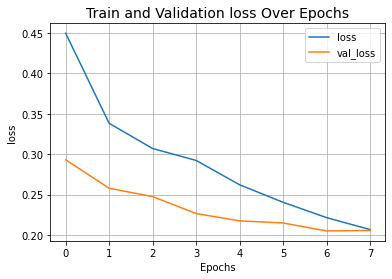

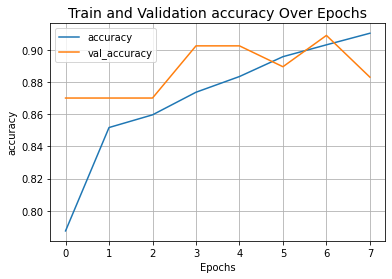

In [ ]:
#Plot Results --- GRU
print('8 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

10 Epochs


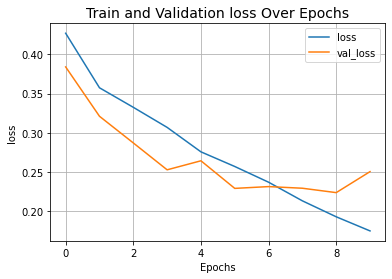

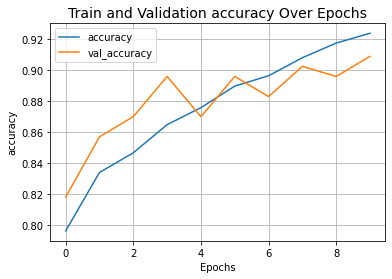

In [ ]:
#Plot Results --- GRU + LSTM
print('10 Epochs')
plot_result(history_senti,"loss")
plot_result(history_senti,"accuracy")

In [ ]:
submit_features = df_test['Review'].values

In [ ]:
x_submit_topic = topic_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()
x_submit_senti = sentiment_classifier_data['VECTORIZER'](np.array([[s] for s in submit_features])).numpy()

In [ ]:
predicted_topics = model_topic(x_submit_topic)
print(predicted_topics[0])

tf.Tensor(
[0.13257152 0.05379221 0.07012141 0.0860976  0.00944749 0.03813189
 0.00555784 0.61120427 0.04005688 0.6366586  0.01389369], shape=(11,), dtype=float32)


In [ ]:
predicted_sentiments = model_senti(x_submit_senti)
print(predicted_sentiments[0])

tf.Tensor([0.00432923], shape=(1,), dtype=float32)


In [ ]:
print(predicted_topics.shape)
print(predicted_sentiments.shape)

(2631, 11)
(2631, 1)


In [ ]:
generate_submission(predicted_topics,predicted_sentiments)

Submission File Downloaded !
Original Length :  2631
Okay 1
Okay 2
   Components  Delivery and Customer Support  ...  Usability  Polarity
0    0.132572                       0.053792  ...   0.013894  0.004329
1    0.015867                       0.004952  ...   0.007387  0.992738
2    0.006647                       0.000261  ...   0.988383  0.999392

[3 rows x 12 columns]
Final Length :  2631
File Saved !
